In [1]:
import matplotlib as mpl
from utils import plot
import matplotlib.pyplot as plt
import numpy as np
import _pickle as pkl
import scipy.stats as stats
import tensorflow as tf
import time
from utils import dataReader, get_session, softmax, gini
import shap
from model import Model

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.


In [2]:
X, y = dataReader()

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Image ID: 1, Image Label : 2


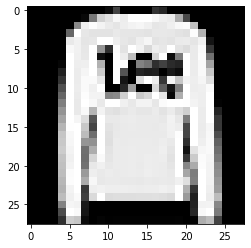

In [3]:
n = 1
original_label = y[n]
test_image = X[n]
plt.rcParams["figure.figsize"]=8,8
print("Image ID: {}, Image Label : {}".format(n, y[n]))
%matplotlib inline
plt.imshow(X[n,:,:,0], cmap='gray')

In [4]:
reference_images = np.zeros((1, 28, 28, 1), dtype=np.float32)

# Natural Training

In [5]:
tf.reset_default_graph()

config_gpu = tf.ConfigProto()
config_gpu.gpu_options.allow_growth = True

with tf.Session(config=config_gpu) as sess:
    model = Model()
    # restore models
    model_dir = 'models/nat_trained'

    saver = tf.train.Saver()
    checkpoint = tf.train.latest_checkpoint(model_dir)
    saver.restore(sess, checkpoint)

    e = shap.DeepExplainer((model.input, model.output), reference_images)

    nat_output = sess.run(model.output, feed_dict={model.input: [test_image]})
    nat_pred = softmax(nat_output)

    print('prediction: {}, confidence: {}'.format(np.argmax(nat_pred), np.max(nat_pred)))

    shap_value = e.shap_values(X[n:n+1])[0][0]




INFO:tensorflow:Restoring parameters from models/nat_trained/checkpoint-24900

prediction: 2, confidence: 0.9948399662971497
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


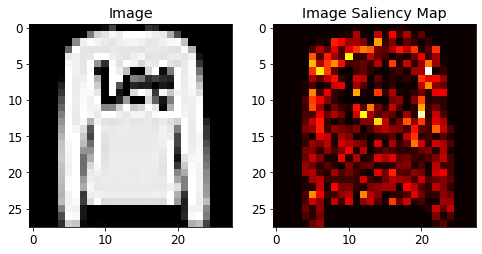

In [6]:
mpl.rcParams["figure.figsize"]=8,8
plt.rc("text",usetex=False)
plt.rc("font",family="sans-serif",size=12)
saliency = np.sum(np.abs(shap_value),-1)
nat_saliency = 28*28*saliency/np.sum(saliency)
plt.subplot(1,2,1)
plt.title("Image")
image = X[n,:,:,0]
plt.imshow(image, cmap='gray')
plt.subplot(1,2,2)
plt.title("Image Saliency Map")
plt.imshow(nat_saliency, cmap="hot")

In [7]:
gini_v = gini(shap_value.flatten())
print('The Gini for SHAP is:', gini_v)

The Gini for SHAP is: 0.6748736121832325


# Adversarial Traininig

In [8]:
tf.reset_default_graph()
tf.keras.backend.clear_session()

config_gpu = tf.ConfigProto()
config_gpu.gpu_options.allow_growth = True

with tf.Session(config=config_gpu) as sess:
    model = Model()
    # restore models
    model_dir = 'models/adv_trained'

    saver = tf.train.Saver()
    checkpoint = tf.train.latest_checkpoint(model_dir)
    saver.restore(sess, checkpoint)

    e = shap.DeepExplainer((model.input, model.output), reference_images)

    nat_output = sess.run(model.output, feed_dict={model.input: [test_image]})
    nat_pred = softmax(nat_output)

    print('prediction: {}, confidence: {}'.format(np.argmax(nat_pred), np.max(nat_pred)))

    shap_value = e.shap_values(X[n:n+1])[0][0]

INFO:tensorflow:Restoring parameters from models/adv_trained/checkpoint-99900
prediction: 2, confidence: 0.8779840469360352


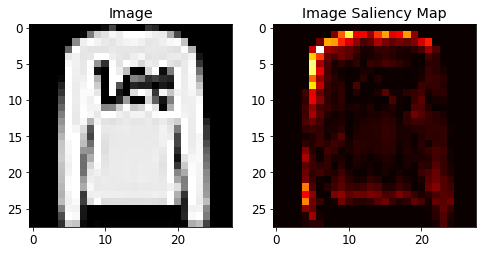

In [9]:
mpl.rcParams["figure.figsize"]=8,8
plt.rc("text",usetex=False)
plt.rc("font",family="sans-serif",size=12)
saliency = np.sum(np.abs(shap_value),-1)
adv_saliency = 28*28*saliency/np.sum(saliency)
plt.subplot(1,2,1)
plt.title("Image")
image = X[n,:,:,0]
plt.imshow(image, cmap='gray')
plt.subplot(1,2,2)
plt.title("Image Saliency Map")
plt.imshow(adv_saliency, cmap="hot")

In [10]:
gini_v = gini(shap_value.flatten())
print('The Gini for SHAP is:', gini_v)

The Gini for SHAP is: 0.7435406912310633


# L1 Norm Regularization 

In [11]:
tf.reset_default_graph()
tf.keras.backend.clear_session()

config_gpu = tf.ConfigProto()
config_gpu.gpu_options.allow_growth = True

with tf.Session(config=config_gpu) as sess:
    model = Model()
    # restore models
    model_dir = 'models/nat_trained_with_l1_reg'

    saver = tf.train.Saver()
    checkpoint = tf.train.latest_checkpoint(model_dir)
    saver.restore(sess, checkpoint)

    e = shap.DeepExplainer((model.input, model.output), reference_images)

    nat_output = sess.run(model.output, feed_dict={model.input: [test_image]})
    nat_pred = softmax(nat_output)

    print('prediction: {}, confidence: {}'.format(np.argmax(nat_pred), np.max(nat_pred)))

    shap_value = e.shap_values(X[n:n+1])[0][0]

INFO:tensorflow:Restoring parameters from models/nat_trained_with_l1_reg/checkpoint-24900
prediction: 2, confidence: 0.9946717619895935


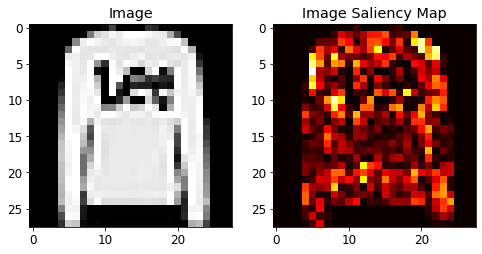

In [12]:
mpl.rcParams["figure.figsize"]=8,8
plt.rc("text",usetex=False)
plt.rc("font",family="sans-serif",size=12)
saliency = np.sum(np.abs(shap_value),-1)
l1_saliency = 28*28*saliency/np.sum(saliency)
plt.subplot(1,2,1)
plt.title("Image")
image = X[n,:,:,0]
plt.imshow(image, cmap='gray')
plt.subplot(1,2,2)
plt.title("Image Saliency Map")
plt.imshow(l1_saliency, cmap="hot")

In [13]:
gini_v = gini(shap_value.flatten())
print('The Gini for SHAP is:', gini_v)

The Gini for SHAP is: 0.6675619851506372
